**Imports**

In [1]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

/home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


**Load data**

In [2]:
dataset = "breast"

names = [
    'id',
    'diagnosis',
    'a_radius', 
	'a_texture', 
	'a_perimeter',
	'a_area',
	'a_smoothness', 
	'a_compactness', 
	'a_concavity', 
	'a_concave_points', 
	'a_symmetry', 
	'a_fractal_dimension',
    'b_radius', 
	'b_texture', 
	'b_perimeter',
	'b_area',
	'b_smoothness', 
	'b_compactness', 
	'b_concavity', 
	'b_concave_points', 
	'b_symmetry', 
	'b_fractal_dimension',
    'c_radius', 
	'c_texture', 
	'c_perimeter',
	'c_area',
	'c_smoothness', 
	'c_compactness', 
	'c_concavity', 
	'c_concave_points', 
	'c_symmetry', 
	'c_fractal_dimension', 
]

X = pd.read_csv("../data/wdbc.data", header=None, names=names)

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc('diagnosis')]
col_list = X.columns[ind]
ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

names.remove('diagnosis')
names.append('diagnosis')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=names)

X.head()

,id,a_radius,a_texture,a_perimeter,a_area,a_smoothness,a_compactness,a_concavity,a_concave_points,a_symmetry,...,c_texture,c_perimeter,c_area,c_smoothness,c_compactness,c_concavity,c_concave_points,c_symmetry,c_fractal_dimension,diagnosis
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.24389,0.28119,M
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.94221,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955,1.152255,0.201391,M
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.93501,M
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.53934,1.371011,1.428493,-0.00956,...,-1.46677,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.3971,M


In [3]:
X['diagnosis'] = X['diagnosis'].replace({'M': 1, 'B': 0})

In [4]:
X = X.astype(float).drop('id',axis=1)

In [5]:
X.head()

,a_radius,a_texture,a_perimeter,a_area,a_smoothness,a_compactness,a_concavity,a_concave_points,a_symmetry,a_fractal_dimension,...,c_texture,c_perimeter,c_area,c_smoothness,c_compactness,c_concavity,c_concave_points,c_symmetry,c_fractal_dimension,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0


**Fit model**

In [11]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=16,
    decoder_l=2,
    threshold=0.1,
    decoder_arch="gcn",
    graph_prior=None,
    prior_mask=None,
    device="cpu",
    beta=1,
    learning_rate=0.01,
    seed=42,
    epochs=10,
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=31, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=31, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=31, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=16, out=8, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=8, out=1, normalization=both, activation=None)
    )
  )
)

In [12]:
gen.fit(X_train)

**Evaluate synthetic data**

In [13]:
X_synth = gen.sample(X_test)
X_synth.head()

,a_radius,a_texture,a_perimeter,a_area,a_smoothness,a_compactness,a_concavity,a_concave_points,a_symmetry,a_fractal_dimension,...,c_texture,c_perimeter,c_area,c_smoothness,c_compactness,c_concavity,c_concave_points,c_symmetry,c_fractal_dimension,diagnosis
0,-0.019321,-0.014849,-0.020107,-0.018986,-0.017919,-0.020678,-0.020764,-0.021028,-0.018955,-0.014503,...,-0.015307,-0.020494,-0.019654,-0.017196,-0.020157,-0.020578,-0.021273,-0.017676,-0.018038,0.0
1,-0.150236,-0.133919,-0.151159,-0.149201,-0.144890,-0.154063,-0.154442,-0.154826,-0.147952,-0.131953,...,-0.135174,-0.153016,-0.150604,-0.142388,-0.152486,-0.152512,-0.154205,-0.143637,-0.145000,0.0
2,0.070192,0.067530,0.070559,0.070648,0.069899,0.071789,0.071092,0.071448,0.070137,0.066232,...,0.067213,0.071070,0.071131,0.069843,0.071323,0.071051,0.071579,0.069601,0.069887,0.0
3,-0.193377,-0.173939,-0.194697,-0.192451,-0.186954,-0.198383,-0.198626,-0.199745,-0.190871,-0.170532,...,-0.176007,-0.196565,-0.194009,-0.183688,-0.196679,-0.196698,-0.199445,-0.183809,-0.187702,0.0
4,-0.023642,-0.017995,-0.023680,-0.022295,-0.021358,-0.024285,-0.024370,-0.024735,-0.022525,-0.017662,...,-0.018600,-0.024543,-0.023164,-0.020837,-0.023885,-0.024181,-0.024855,-0.021112,-0.021293,0.0


In [14]:
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="diagnosis",
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column="diagnosis",
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {(res[1][0] - res[1][1]):.3f}"
)

Quality: 0.283
Detection: 0.827
Performance on real: 0.980, on synth: 0.000, diff: 0.980


**Generate TSNE plots**

In [11]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "diagnosis"], axis=1)

In [12]:
tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

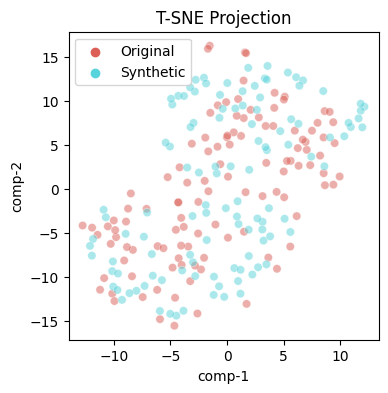

In [13]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()

**Visualise adjacency matrix**

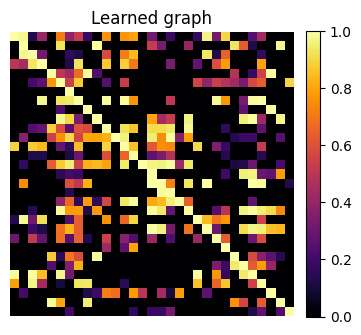

In [15]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Learned graph")
plt.axis("off")
plt.show()